In [117]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets

In [118]:
#load_data
(x_train,y_train),(x_test,y_test)=datasets.cifar100.load_data()
#Normalization
(x_train,x_test)=(x_train/255,x_test/255)

In [119]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

In [120]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(100,activation='softmax'))

In [121]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [122]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1407/1407 [==============================] - 8s 4ms/step - loss: 3.7813 - accuracy: 0.1302 - val_loss: 3.3378 - val_accuracy: 0.2020
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 3.0617 - accuracy: 0.2522 - val_loss: 3.0548 - val_accuracy: 0.2572
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 2.7558 - accuracy: 0.3127 - val_loss: 2.8960 - val_accuracy: 0.2856
Epoch 4/5
1407/1407 [==============================] - 6s 4ms/step - loss: 2.5510 - accuracy: 0.3520 - val_loss: 2.8956 - val_accuracy: 0.2900
Epoch 5/5
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3987 - accuracy: 0.3822 - val_loss: 2.7970 - val_accuracy: 0.3146


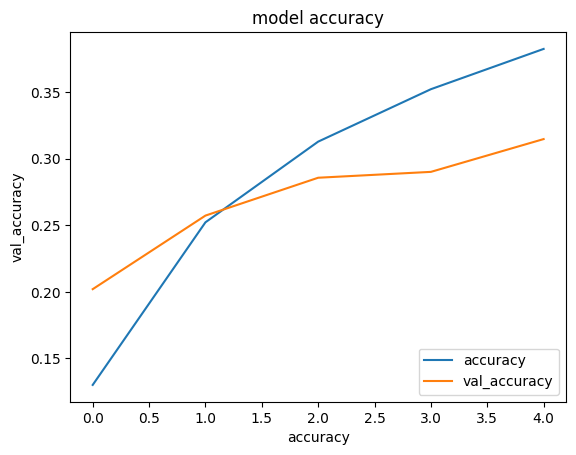

In [123]:
#model_accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')
plt.show()

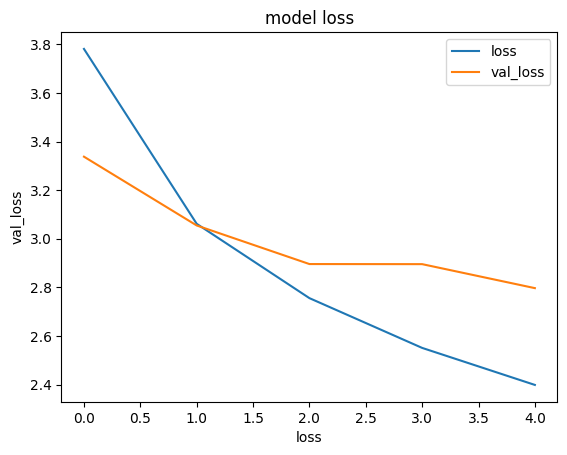

In [124]:
#model_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

In [125]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[3.7028376e-09, 3.5168518e-06, 9.8112121e-04, ..., 1.3722123e-04,
        2.8319526e-04, 1.4445203e-03],
       [1.0979573e-04, 2.1132038e-03, 1.5639476e-03, ..., 3.4352072e-02,
        2.6363996e-04, 4.6108942e-03],
       [4.7030920e-08, 5.7339941e-05, 6.2564499e-04, ..., 2.4705858e-04,
        7.1503938e-04, 2.6539763e-05],
       ...,
       [1.3948128e-03, 3.3759810e-02, 6.8714799e-05, ..., 9.3947085e-05,
        7.2371324e-05, 8.8746417e-03],
       [3.9445906e-05, 7.0327143e-05, 8.1887804e-03, ..., 8.3401471e-02,
        2.0805413e-03, 3.9451132e-03],
       [1.9826342e-03, 7.8948483e-02, 4.4052195e-02, ..., 4.9902582e-07,
        1.0627412e-02, 8.8994962e-04]], dtype=float32)

In [126]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([49, 63, 15, ..., 18, 42, 45])

In [127]:
#accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.3207